# Individual Challenge Dungeons and Dragons CR Predictor

## Domain Understanding



Dungeons and Dragons (D&D) is a tabletop role-playing game that is all about collaborative storytelling where the players and the Dungeon Master(DM) proceed through the story together and encounter a wide variety of monsters and other things. In D&D, players often fight against monsters, which have a bunch of characteristics, including stats like strength, dexterity, constituation, intelligence, wisdom and charisma. Each monster is assigned a Challenge Rating (CR), which represents how difficult that creature is for players to defeat.

Having an understanding of the different traits and abilities of these monster is essential for Dungeon Masters (DMs) who create and plan these encounters for the players,
and players who might want to be extra prepared and strategize against different monsters.


This monster data can help inform players and the DM How to balance encounters based on CR and How certain types of monsters perform based on their characteristics and stats.


For this project, we focus on analyzing the data of D&D monsters, including key features like Challenge Rating (CR), hit points (HP), armor class (AC), and attributes (strength, dexterity, etc.) to gain insight into the nature of these creatures and potential gameplay outcomes.

Our research question will thus be **"Can we predict the Challenge Rating (CR) of a monster based on its attributes and characteristics?"**

Because we are attempting to gain insight by analyzing the data and applying a ML algorithm, i feel that the research method **"Data Analytics(Lab)"** is suitable for this project

## Data Sourcing

The dataset for this project is drawn from Kaggle. The validity of the data has been cross-checked against the official data sources which are the D&D initial release of the 'Monster Manual' and other API's like https://open5e.com/ and https://www.dnd5eapi.co/

This dataset only contains the monsters from the initial release of the Monster Manual.

In this project, our goal is to analyze the attributes of D&D monsters, such as Challenge Rating (CR), hit points (HP) and armor class (AC). To get useful insights, the dataset must contain a diverse range of monsters and their characteristics.

The dataset for this project contains a total of 17 features and 762 observations.

## Analytic Approach

### 🎯 Target variable

As mentioned above, the target variable is the feature **'CR'** which is a numerical representation of the difficulty level of the monster.

When we look at the list of features, it is clear that we don't need all of them. We will be dropping features like 'Url', 'Align' and 'Type' because they are not relevant to the difficulty of a monster or simple are of no use (like the url).

## The Model
I choose to use regression over classification for predicting Challenge Rating (CR) values because we are dealing with a continuous range of outcomes, spanning from 0 to 30. The nature of the CR value is somewhat fluid, with certain values, such as those between 25 and 30, not currently represented in the dataset. Given this wide span and the presence of gaps in potential CR values, i think employing a classification model would be unsuitable, as it would require defining numerous outcome classes that could complicate the predictive task. Therefore, regression is a more appropriate choice and i will be exploring **Linear Regression** for now

## Correlation matrix

To determine if the features in our dataset are good indicators of the target variable (CR), we can start by exploring the correlations between the target and other features.
For that, we will first have to encode some of our features before they can be used in the correlation matrix.


In [428]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/Huijb/OneDrive/Bureaublad/dnd_monsters.csv'
df = pd.read_csv(file_path)

df = df.drop(columns=['url', 'source', 'type', 'align', 'speed'])

def convert_cr(value):
    try:
        if '/' in str(value):
            n, d = map(int, value.split('/'))
            return n / d
        else:
            return float(value)  
    except (ValueError, TypeError):  
        return float('nan')  

df = df.dropna(subset=['cr'])
df['cr'] = df['cr'].apply(convert_cr)

df['legendary'] = df['legendary'].apply(lambda x: 1 if x == 'Legendary' else 0)

size_mapping = {
    'Tiny': 1,
    'Small': 2,
    'Medium': 3,
    'Large': 4,
    'Huge': 5,
    'Gargantuan': 6
}

df['size'] = df['size'].map(size_mapping)


We have encoded the 'Size' and 'Legendary' features from strings to ints.

Because the 'Size' feature is ordinal, we encode it as 1 through 6 from smallest to largest.
Legendary is encoded as a boolean, where 0 is not legendary and 1 is legendary.

Now with these values, we can make ourselves a visualization of the correlations between features.



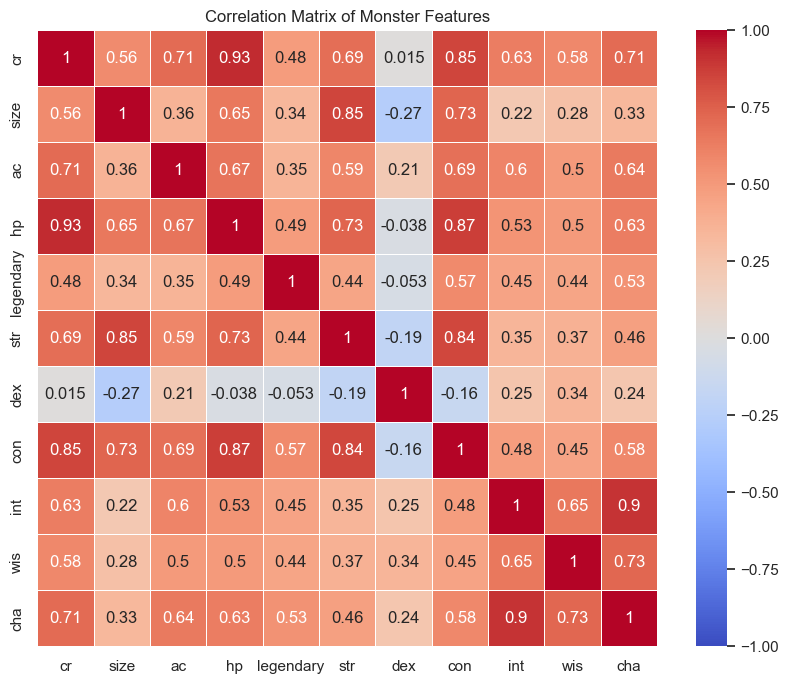

In [429]:
corr_df = df.select_dtypes(include=[float, int])

correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Monster Features')
plt.show()

From the matrix , we can gather the following information:

- HP and Constitution have strong correlations with CR (0.93 and 0.85), indicating durability is the most imporant factor.

- Charisma, Strength, and Armor Class (correlations ~0.7) also contribute significantly to the CR

- Dexterity has a negligible correlation (0.015), suggesting it's way less relevant for predicting CR.

- Legendary status and Size show moderate correlations, suggesting thar larger or legendary creatures tend to have higher CR.


## Data Requirements

### Data Elements

For this project, the key data elements include:

- **Name:** The name of the monster.
- **Challenge Rating (CR):** A numerical measure of the monster's difficulty.
- **Hit Points (HP):** Total health of the monster.
- **Armor Class (AC):** Defense score representing how hard it is to hit the monster.
- **Ability Scores (STR, DEX, CON, INT, WIS, CHA):** Numerical representation of the monsters Strength, Dexterity, Constitution, Intelligence, Wisdom, and Charisma.
- **Legendary Status:** Binary (0 or 1), whether the monster has legendary abilities.
- **Size:** Encoded as an integer, representing the physical size of the monster.

### Data volume

With the dataset we are currently using, the goal is to have sufficient data to cover a broad variety of monsters with different CR values. A dataset of a few hundred monsters should be sufficient for a basic model, though more data would be better to improve the performance.

The dataset we are using has at least dozens of unique monsters, which is a good foundation to us to build on. However, if necessary , additional data can be sourced from other official monster lists or other D&D-related datasets.

### Data Quality Standards

- **Accuracy**: All numerical fields (HP, AC, CR, ability scores) must be correct in a way in which there are no outliers that are physically impossible (such as negative HP).
- **Completeness**: There should be no missing values for key fields such as CR, HP, AC, or ability scores. For missing values, appropriate methods such as imputation should be considered.
- **Consistency**: Data types need to be consistent. For example, CR should be numeric and categorical features like legendary status should be encoded uniformly.
- **Relevance**: Only features that contribute meaningfully to predicting CR should be retained. So we avoiding features like URLs or sources that have no predictive value.

### Ethical and Legal Aspects

For this project, ethical concerns are minimal because the dataset involves fictional creatures from a tabletop game rather than personal or sensitive information. 
However, if we end up needing to scrape additional data from online sources, it's important to respect the terms of service of the website.


### Data Dictionary

#### 1. Data Element Name: **Challenge Rating (CR)**
- **Data Type**: Numerical
- **Range**: 0 to 30
- **Description**: A measure of a monster's difficulty level, representing the encounter's toughness for a group of adventurers.
- **Quality Standards**: Accurate numerical values, no missing data, proper handling of fractional values.
- **Notes**: Fractions like 1/2 or 1/4 are converted to decimals.
---

#### 2. Data Element Name: **Hit Points (HP)**
- **Data Type**: Numerical
- **Range**: 1 to several hundred
- **Description**: The amount of damage a monster can take before it dies.
- **Quality Standards**: No negative values
- **Notes**: HP is correlated with size and constitution.
---

#### 3. Data Element Name: **Armor Class (AC)**
- **Data Type**: Numerical
- **Range**: 5 to 30 (typically)
- **Description**: A measure of how difficult it is to land a successful hit on the monster.
- **Quality Standards**: No missing values, values should be realistic.
---

#### 4. Data Element Name: **Strength (STR)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s physical power.
- **Notes**: Tends to be higher for large or physically powerful monsters. Monsters with high Strength often have high Constitution as well.
---

#### 5. Data Element Name: **Dexterity (DEX)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s agility and reflexes.
---

#### 6. Data Element Name: **Constitution (CON)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A measure of the monster's endurance and health.
- **Notes**: High CON often leads to more HP.
---

#### 7. Data Element Name: **Intelligence (INT)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s cognitive abilities and knowledge.
---

#### 8. Data Element Name: **Wisdom (WIS)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A measure of perception and insight.
---

### 9. Data Element Name: **Charisma (CHA)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s influence and social power.
---

### 10. Data Element Name: **Size**
- **Data Type**: Categorical (encoded as integer)
- **Range**: Tiny (1) to Gargantuan (6)
- **Description**: The physical size of the monster.
- **Quality Standards**: Correct mapping from categorical to numerical values.
- **Notes**: Encoded to allow numerical representation of size in the model.

---

### 11. Data Element Name: **Legendary Status**
- **Data Type**: Categorical (encoded as binary)
- **Units**: Integer (0 or 1)
- **Range**: 0 (Non-legendary) to 1 (Legendary)
- **Description**: Whether the monster has legendary abilities or not.
- **Quality Standards**: Consistent binary encoding.
- **Notes**: Legendary monsters typically have unique abilities and higher CR.

## Data Collection

As mentioned before, the used dataset for this project is drawn from Kaggle. The dataset has been downloaded and has been stored as a csv file on my pc.
If i need to expend on this data in the future, i can use the following APIs : https://open5e.com/ and https://www.dnd5eapi.co/.

This dataset is a 'set' list of monsters that wont change. Therefore this dataset will likely seldomly be updated.

## Data Understanding

In [430]:
print(df.describe())

               cr        size          ac          hp   legendary         str  \
count  761.000000  761.000000  761.000000  761.000000  761.000000  401.000000   
mean     5.552398    3.365309   14.596583   88.245729    0.056505   15.231920   
std      6.254149    1.026263    3.097782   94.830729    0.231045    6.492964   
min      0.000000    1.000000    5.000000    1.000000    0.000000    1.000000   
25%      0.500000    3.000000   12.000000   22.000000    0.000000   11.000000   
50%      3.000000    3.000000   14.000000   58.000000    0.000000   16.000000   
75%      9.000000    4.000000   17.000000  126.000000    0.000000   19.000000   
max     30.000000    6.000000   25.000000  676.000000    1.000000   30.000000   

              dex         con         int         wis         cha  
count  401.000000  401.000000  401.000000  401.000000  401.000000  
mean    12.745636   15.147132    8.324190   11.820449   10.097257  
std      3.183573    4.383012    5.694264    3.093167    5.696755 

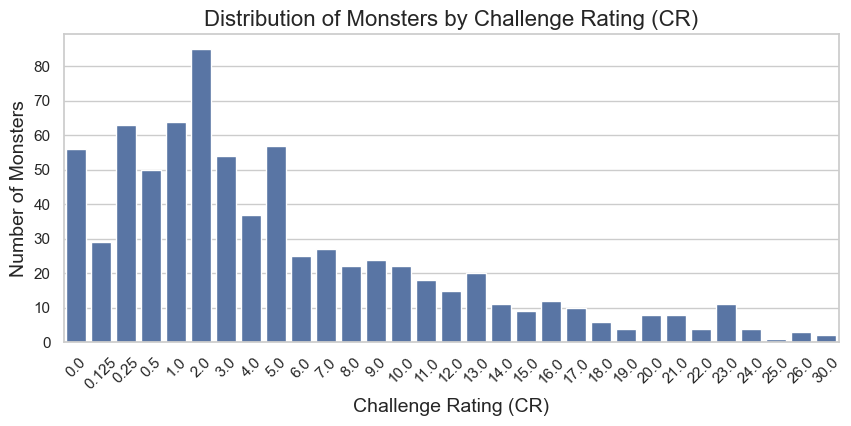

In [431]:
cr_counts = df['cr'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=cr_counts.index, y=cr_counts.values)

plt.title('Distribution of Monsters by Challenge Rating (CR)', fontsize=16)
plt.xlabel('Challenge Rating (CR)', fontsize=14)
plt.ylabel('Number of Monsters', fontsize=14)

plt.xticks(rotation=45)

plt.show()

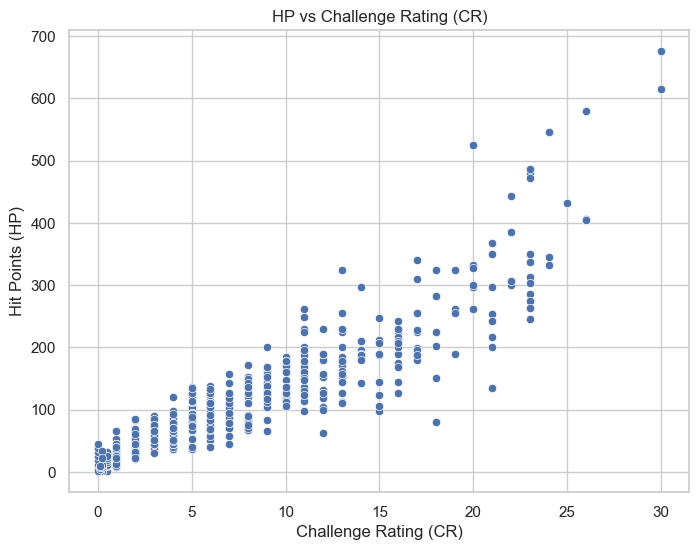

In [432]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cr', y='hp', data=df)
plt.title('HP vs Challenge Rating (CR)')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Hit Points (HP)')
plt.show()

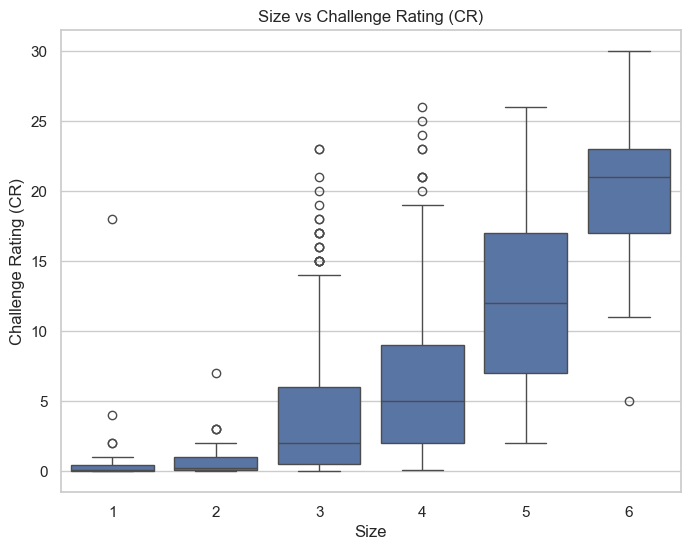

In [433]:
# Boxplot for Size vs CR
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='cr', data=df)
plt.title('Size vs Challenge Rating (CR)')
plt.xlabel('Size')
plt.ylabel('Challenge Rating (CR)')
plt.show()

## Data Preparation



In our data understanding stage, we encountered missing values in several columns (Strength, Dexterity, Constitution etc) in about 360 out of 761 rows. Since removing these rows would result in significant data loss, we opted for a simpler approach, which is filling the missing values with the mean of each respective column. 
This method was chosen for its simplicity and because it ensures that no data is discarded, while still maintaining the general distribution of the stats. Ultimately, we hope this preprocessing step will enable the model to make accurate predictions, with minimal bias introduced from the imputation.

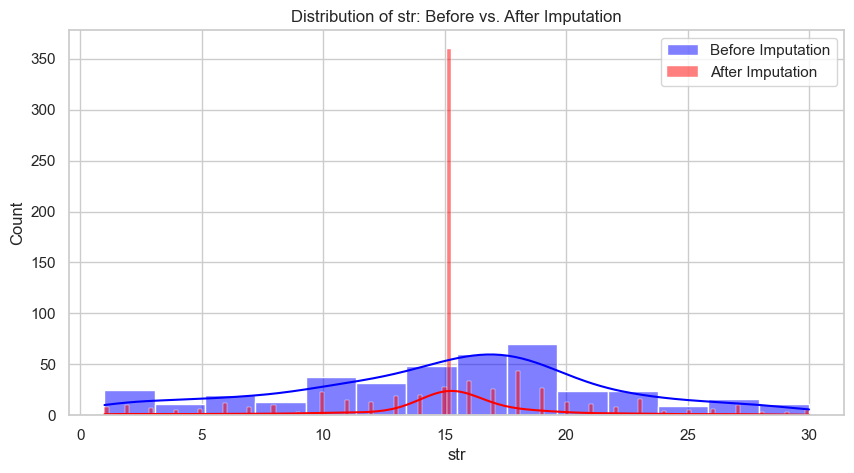

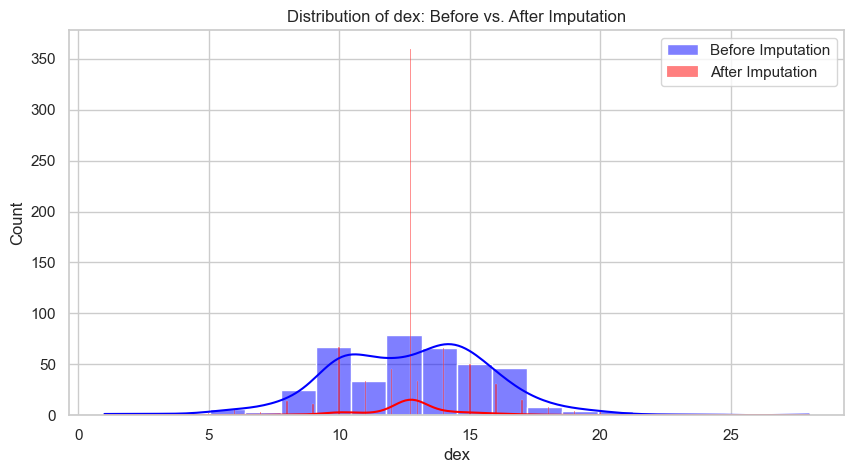

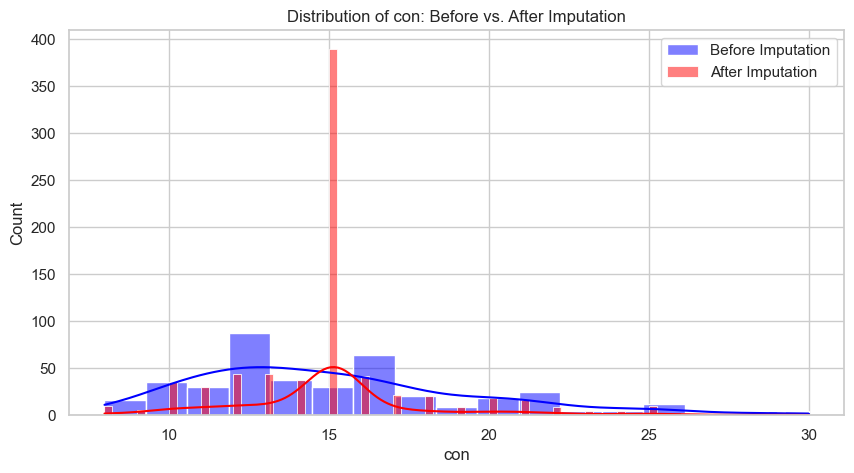

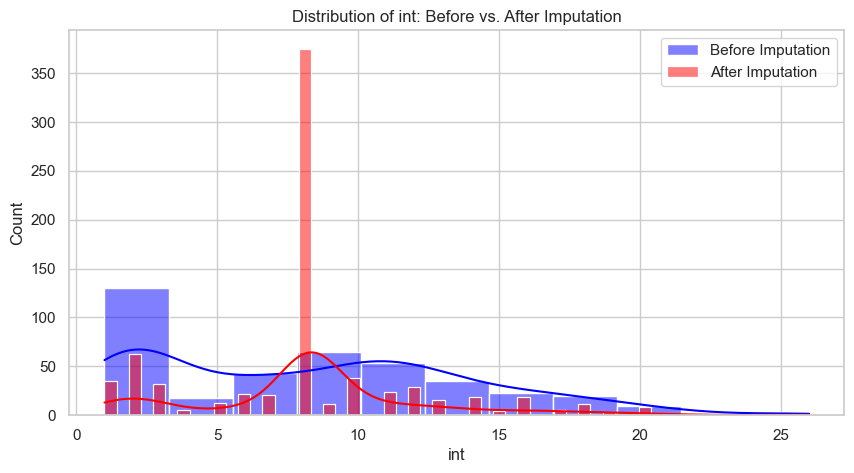

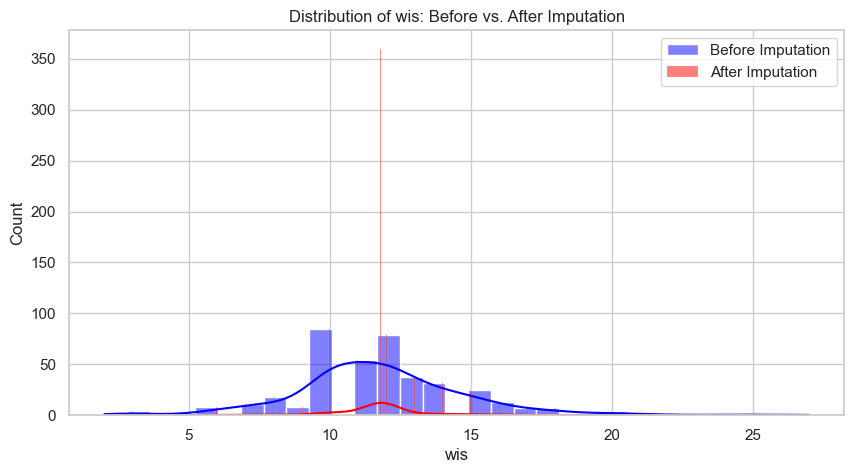

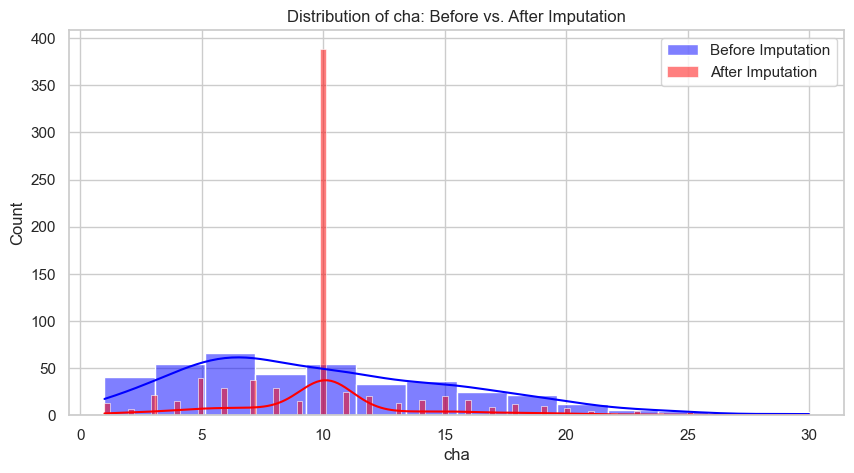

In [434]:
df_before = df.copy()
df_mean = df.copy()

stats_columns = ['str', 'dex', 'con', 'int', 'wis', 'cha']
for col in stats_columns:
    df_mean.fillna({col: df_mean[col].mean()}, inplace=True)

for col in stats_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_before[col], kde=True, color='blue', label='Before Imputation', alpha=0.5)
    sns.histplot(df_mean[col], kde=True, color='red', label='After Imputation', alpha=0.5)
    plt.title(f'Distribution of {col}: Before vs. After Imputation')
    plt.legend()
    plt.show()

This distrubution looks very wrong, seeing such a spike would be expected when using the mean as the filler value. 
I might consider reverting this decision after i tested both of them out in the model.
To do that, we make 2 copies of the original dataframe. one fro the imuptation and one where the missing rows are removed

In [435]:

df_imputed = df.copy()
stats_columns = ['str', 'dex', 'con', 'int', 'wis', 'cha']
for col in stats_columns:
    df_imputed.fillna({col: df_imputed[col].mean()}, inplace=True)

df_cleaned = df.dropna(subset=stats_columns)


### Preparation

In [436]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

target = 'cr'
features = ['size', 'ac', 'hp', 'legendary', 'str', 'dex', 'con', 'int', 'wis', 'cha']

X_imputed = df_imputed[features]
y_imputed = df_imputed[target]
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=1)

X_cleaned = df_cleaned[features]
y_cleaned = df_cleaned[target]
X_train_cln, X_test_cln, y_train_cln, y_test_cln = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=1)



### Training

In [437]:
model_cln = LinearRegression()
model_cln.fit(X_train_cln, y_train_cln)

model_imp = LinearRegression()
model_imp.fit(X_train_imp, y_train_imp)


LinearRegression()

### Prediction and evaluation

In [438]:

y_pred_cln = model_cln.predict(X_test_cln)
mse_cln = root_mean_squared_error(y_test_cln, y_pred_cln)
r2_cln = r2_score(y_test_cln, y_pred_cln)


y_pred_imp = model_imp.predict(X_test_imp)
mse_imp = root_mean_squared_error(y_test_imp, y_pred_imp)
r2_imp = r2_score(y_test_imp, y_pred_imp)

In [439]:

print(f"Mean Imputation Model - MSE: {mse_imp:.2f}, R2: {r2_imp:.2f}")
print(f"Removed Missing Values Model - MSE: {mse_cln:.2f}, R2: {r2_cln:.2f}")

Mean Imputation Model - MSE: 2.10, R2: 0.88
Removed Missing Values Model - MSE: 1.87, R2: 0.91


#### Mean Imputation Model

- MSE (Mean Squared Error): 2.10
- R1 (Coefficient of Determination): 0.88
- This indicates that the model can explain 88% of the variance in the CR rating based on the features we have provided. The MSE of 2.10 suggests that, on average, the prediction deviates from the actual CR values by about 2.1 units.

#### Removed Missing Values Model

- MSE: 1.87
- R2: 0.91
- This model has a slightly lower MSE, indicating better accuracy in predicting the CR compared to the mean imputation model. However, both models have the almost the same R2 value, which means they explain the same proportion of variance in the data.

It seems the model that dropped the missing values achieved a lower MSE, suggesting it performed better overall in terms of accuracy. The similar R2 values indicate that both models are at least very effective at explainingg the variance in the target variable.

Removing rows with missing values here leads to a cleaner dataset, which can improve the prediction the of model. In contrast, mean imputation may introduce bias, especially if the missing data isn't random.

### Linearity

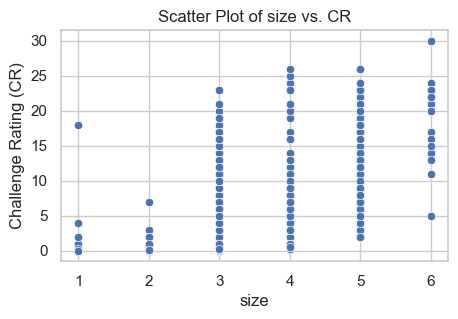

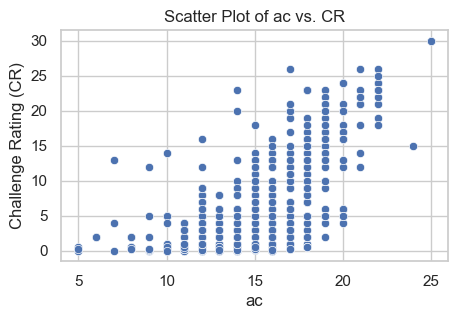

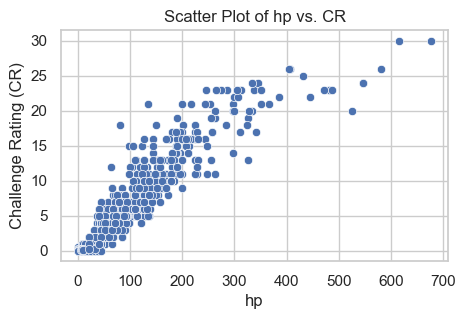

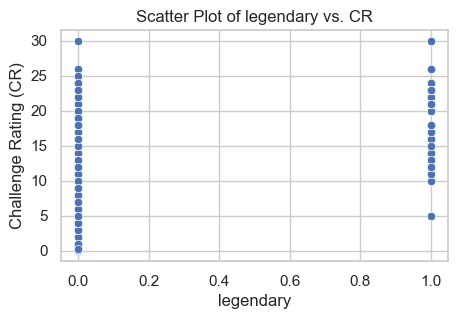

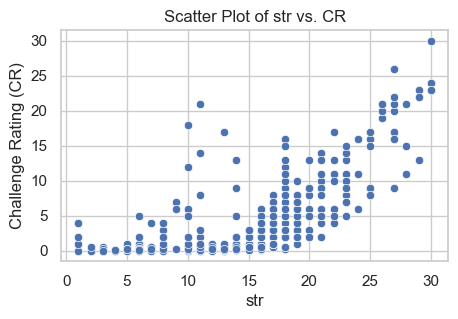

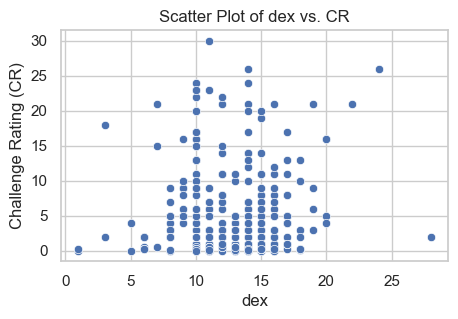

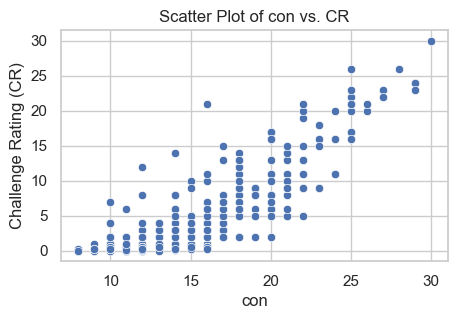

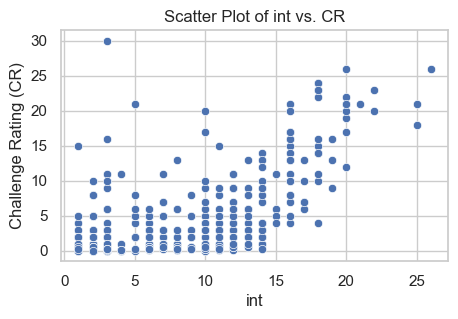

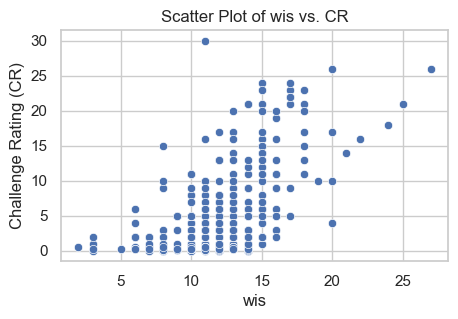

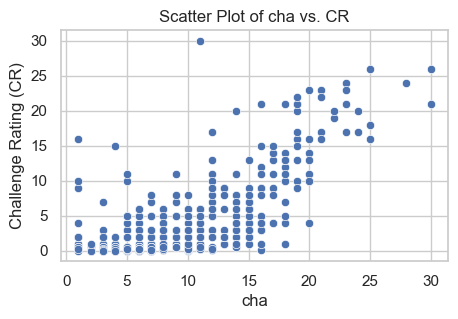

In [440]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['size', 'ac', 'hp', 'legendary', 'str', 'dex', 'con', 'int', 'wis', 'cha']

for feature in features:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=df[feature], y=df['cr'])
    plt.title(f'Scatter Plot of {feature} vs. CR')
    plt.xlabel(feature)
    plt.ylabel('Challenge Rating (CR)')
    plt.show()

In analyzing the scatter plots to assess the linearity between features and the CR, we can see that several features, such as AC and CON, show a somewhat linear trend. However, they still display a degree of scatter, forming a thick "band" that loosely follows the linear trajectory. 

In contrast, the HP feature, which is arguably the most important variable in our dataset, reveals a curved pattern, particularly in the latter half of the CR values, around a value of 15. This seems to suggests that the impact of HP on CR changes at higher ratings. 

Additionally, features like STR, DEX, CHA, WIS, and INT appear to be scattered with little relationship to CR beyond the slightest linearity, indicating that they may not be as influential in predicting the CR values. These insights imply that while some features may align with linear regression, others, particularly HP, point toward the need of exploring more flexible models like Random Forest to capture these relationships better.

### Random Forest


We chose Random Forest for this analysis due to its capacity to better capture the non-linear relationships in our dataset that linear regression might fail to capture. 
Unlike linear regression, which relies on the assumption of a direct, linear relationship between features and the CR feature, Random Forest should effectively captures these interactions and patterns among features. Additionally, Random Forest is able to provide us with insights into feature importance, allowing us to see which attributes significantly influence CR. Given the variability observed in critical features like Hit Points, using Random Forest enables us to improve our predictions while accounting for the complexities of these monsters.

In [441]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score


X = df[['hp', 'ac', 'size', 'legendary', 'str', 'dex', 'con', 'int', 'wis', 'cha' ]]
y = df['cr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_model = RandomForestRegressor(n_estimators=200, random_state=1, min_samples_split=5, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

importances = rf_model.feature_importances_
feature_names = X.columns
print("Feature importances:", dict(zip(feature_names, importances)))


Mean Squared Error: 1.727538883458677
R² Score: 0.9146698127265562
Feature importances: {'hp': np.float64(0.9377343636433704), 'ac': np.float64(0.021970665918983945), 'size': np.float64(0.005009675458263211), 'legendary': np.float64(0.006922048005568935), 'str': np.float64(0.004707802517425414), 'dex': np.float64(0.0026572712858081355), 'con': np.float64(0.002327605592288853), 'int': np.float64(0.00681377733344442), 'wis': np.float64(0.004019992837913576), 'cha': np.float64(0.007836797406933133)}


The MSE is around 1.73. this si agood increase compared to the MSE of 1.87 tha the Linear Regression model with dropped observations gave us.
The R2 score of 0.91 is similar to our previous results , which was already quite strong.

The feature importances reveal something interesting though.

HP clearly dominate the prediction as we expected, contributing about 93.8% to the model's decisions.
Other features like AC and the remaining attributes have minimal contributions compared to the HP.

Based on this, if i want to try to improve the prediction, it might be worthwhile to try to scrape some features from an API.

## Conclusion

In this particular analysis using the Dungeons & Dragons monsters dataset, we made use of a Linear Regression and a Random Forest Regressor for the prediction of the CR of different creatures. The predictions made by the model have an approximate MSE of about 1.73, while the R2 score was found to be around 0.91, meaning that the model was a good fit in terms of explanatory power.

From the feature importance ranking, it was observed that HP is the singlemost important feature as it accounted for almost 93.8 % of the predictions made by the model. This is consistent with the mechanics and rules as established under Dungeons & Dragons such as the use of HP to determine a creature’s ability to withstand challenges as well as the overall challenge of a creature. Armor Class and various ability scores were also contested further but showed less significant contributions meaning that measuring them might not be useful in predicting CR. In the future, it might be interesting to get more offense features and see how those features impact the performance of the model. Some other future work may include hyperparameter tuning and additional feature engineering to improve the predictive power of the model.